In [ ]:
#!pip install scikit-fuzzy
#Rodrigo Augusto de Oliveira GEC
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Criando os antecedentes

In [ ]:
# qualidade da comida e serviço vai determinar o valor da gorjeta

speed = ctrl.Antecedent(np.arange(0, 181, 1), "speed") # varia de 0 a 1 do grafico mostrado em aula
mass = ctrl.Antecedent(np.arange(0, 2.5, 0.1), "mass") # varia de 0 a 1 do grafico mostrado em aula

speed.automf(5, names=["mb", "ba" , "me" , "al" , "ma"])  # so pode ser 3,5 ou 7 Categorias no grafico
mass.automf(5, names=["mp", "pe" , "me" , "gr" , "mg"])


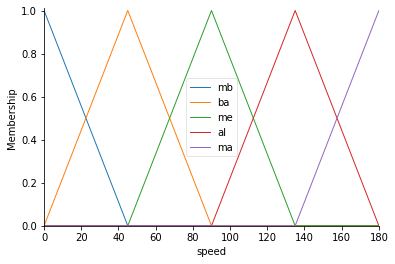

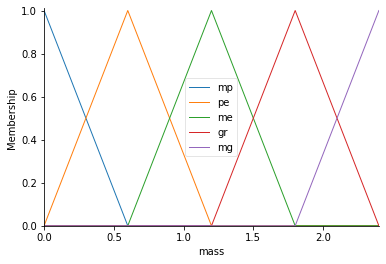

In [ ]:
speed.view()
mass.view()



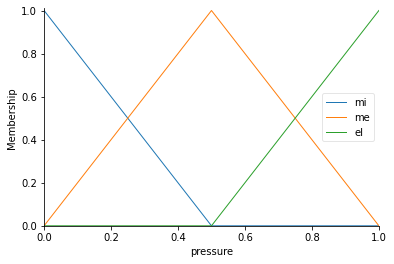

In [ ]:
 pressure =ctrl.Consequent(np.arange(0,1.1, 0.1), "pressure") # a consequencia  

pressure["mi"] = fuzz.trimf(pressure.universe, [0, 0, 0.5])   
pressure["me"] = fuzz.trimf(pressure.universe, [0, 0.5, 1]) 
pressure["el"] = fuzz.trimf(pressure.universe, [0.5, 1, 1]) 

pressure.view()

In [ ]:
rule1 = ctrl.Rule(mass["mp"] & speed["mb"], pressure["mi"])
rule2 = ctrl.Rule(mass["mp"] & speed["ba"], pressure["mi"])
rule3 = ctrl.Rule(mass["mp"] & speed["me"], pressure["mi"])
rule4 = ctrl.Rule(mass["mp"] & speed["al"], pressure["me"])
rule5 = ctrl.Rule(mass["mp"] & speed["ma"], pressure["me"])

rule6 = ctrl.Rule(mass["pe"] & speed["mb"], pressure["mi"])
rule7 = ctrl.Rule(mass["pe"] & speed["ba"], pressure["mi"])
rule8 = ctrl.Rule(mass["pe"] & speed["me"], pressure["mi"])
rule9 = ctrl.Rule(mass["pe"] & speed["al"], pressure["me"])
rule10 = ctrl.Rule(mass["pe"] & speed["ma"], pressure["me"])

rule11 = ctrl.Rule(mass["me"] & speed["mb"], pressure["mi"])
rule12 = ctrl.Rule(mass["me"] & speed["ba"], pressure["mi"])
rule13 = ctrl.Rule(mass["me"] & speed["me"], pressure["me"])
rule14 = ctrl.Rule(mass["me"] & speed["al"], pressure["me"])
rule15 = ctrl.Rule(mass["me"] & speed["ma"], pressure["me"])

rule16 = ctrl.Rule(mass["gr"] & speed["mb"], pressure["me"])
rule17 = ctrl.Rule(mass["gr"] & speed["ba"], pressure["me"])
rule18 = ctrl.Rule(mass["gr"] & speed["me"], pressure["el"])
rule19 = ctrl.Rule(mass["gr"] & speed["al"], pressure["el"])
rule20 = ctrl.Rule(mass["gr"] & speed["ma"], pressure["el"])

rule21 = ctrl.Rule(mass["mg"] & speed["mb"], pressure["me"])
rule22 = ctrl.Rule(mass["mg"] & speed["ba"], pressure["me"])
rule23 = ctrl.Rule(mass["mg"] & speed["me"], pressure["el"])
rule24 = ctrl.Rule(mass["mg"] & speed["al"], pressure["el"])
rule25 = ctrl.Rule(mass["mg"] & speed["ma"], pressure["el"])
  

In [ ]:
pressuring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3 ,rule4 , rule5 , rule6 , rule7 , rule8 , rule9 , rule10 ,
                                   rule11 , rule12 , rule13 , rule14 , rule15 , rule16 , rule17 , rule18,
                                   rule19 , rule20 , rule21 , rule22 , rule23 , rule24 , rule25]) 
pressuring = ctrl.ControlSystemSimulation(pressuring_ctrl)

0.5595238095238095


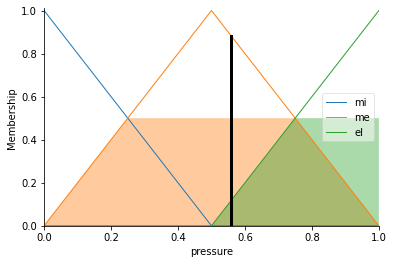

In [ ]:
pressuring.input["speed"] = 1555
pressuring.input["mass"] = 1.5

pressuring.compute()

print(pressuring.output["pressure"])
pressure.view(sim=pressuring)